# Laporan Proyek Machine Learning - Audric Lysander

## Domain Proyek

> Bank adalah salah satu badan usaha lembaga keuangan yang memiliki tujuan untuk memberikan jasa serta kredit [Sumber](https://repository.unpar.ac.id/bitstream/handle/123456789/1553/Sentosa_138949-p.pdf?sequence=1&isAllowed=y). 

> Churn adalah kata dari bahasa Inggris yang memiliki arti beralih, dimana nasabah atau customer akan beralih ke perusahaan lainnya karena beberapa faktor, seperti faktor harga yang kurang tepat dikantong nasabah, kualitas jasa atau produk yang diberikan kurang sesuai dengan harapan, atau kurangnya fitur yang tidak sesuai dengan yang ditawarkan [Sumber](https://repository.uinjkt.ac.id/dspace/bitstream/123456789/18656/1/DELFIA%20ZANNA-FSH.pdf).

> Bank dapat beroperasi ketika mereka memiliki nasabah yang menggunakan jasa mereka, ketika banyak nasabah yang beralih, maka kegiatan pemberian jasa, kredit, meredarkan alat pembayaran baru, dan lain-lain akan terhambat. Sehingga bank harus memastikan bahwa hal ini dapat di minimalisir, bisa saja dengan memperbaiki kualitas jasa, memberikan fitur yang sesuai, dan lain sebagainya. Selain itu, bank juga dapat melakukan prediksi untuk mengetahui apakah seorang nasabah akan beralih atau tidak, sehingga sebelum nasabah tersebut beralih, mungkin pihak bank dapat memberikan penawaran lain yang sesuai dengan nasabah, sehingga nasabah tidak jadi untuk beralih.

## Business Understanding

### Problem Statements
- Apakah kita dapat memprediksi nasabah akan keluar atau tidak?
- Model (Logistic Regression, KNN, Random Forest, dan Adaboosting) manakah yang paling baik dalam melakukan prediksi studi kasus ini>

## Goals
- Dapat melakukan prediksi nasabah akan tetap menggunakan jasa bank atau tidak
- Dapat mengetahui model paling baik dalam melakukan prediksi

## Data Understanding

Data yang akan digunakan dalam proyek ini adalah dataset Bank Data - Churn Classification, dimana data ini dapat digunakan untuk melakukan klasifikasi untuk nasabah yang akan melakukan Churn ataupun tidak, untuk dataset yang dipakai dapat dibuka pada tautan [ini](https://www.kaggle.com/datasets/parisanahmadi/bank-data-churn-classification).

### Variabel-variabel pada Bank Data - Churn Classification:
- RowNumber: Nomor urut baris data
- CustomerId: Nomor identifikasi unik yang diberikan oleh Bank kepada setiap nasabah
- CreditScore: Angka dari 300 hingga 850 yang menggambarkan kelayakan kredit nasabah
- Geography: Lokasi pelanggan dapat mempengaruhi keputusan mereka untuk meninggalkan bank
- Gender: Jenis kelamin nasabah (Female / Male)
- Age: Umur nasabah dalam tahun
- Tenure: Jumlah tahun nasabah telah menjadi nasabah bank
- Balance: akumulasi dari transaksi utang sebelumnya
- NumOfProducts: Jenis produk keuangan yang dipakai oleh nasabah
- HasCrCard: Status kepemilikan credit card nasabah
- IsActiveMember: Status ke-aktivan nasabah
- EstimatedSalary: Estimasi pendapatan nasabah
- Exited: Status keluarnya nasabah

### Import Libraries

> Melakukan import library yang akan digunakan.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')

> Load dataset yang akan dipakai.

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

### Exploratory Data Analysis

> Melihat 5 data teratas dan terbawah.

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


> Melihat informasi dataset, dimana dataset memiliki 14 kolom dengan 10000 baris data tanpa adanya null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
pd.DataFrame({'Features': df.columns,
              'dataType': df.dtypes.values,
              'nullvalues': [df[i].isna().sum() for i in df.columns],
              'unique': [df[i].nunique() for i in df.columns],
              'uniqueSample': [list(pd.Series(df[i].unique()))
                               for i in df.columns]}).reset_index(drop=True)

,Features,dataType,nullvalues,unique,uniqueSample
0,RowNumber,int64,0,10000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,CustomerId,int64,0,10000,"[15634602, 15647311, 15619304, 15701354, 15737..."
2,Surname,object,0,2932,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba..."
3,CreditScore,int64,0,460,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ..."
4,Geography,object,0,3,"[France, Spain, Germany]"
5,Gender,object,0,2,"[Female, Male]"
6,Age,int64,0,70,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2..."
7,Tenure,int64,0,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
8,Balance,float64,0,6382,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78..."
9,NumOfProducts,int64,0,4,"[1, 3, 2, 4]"


> Melihat ukuran pemusatan data pada data numerikal dan kategorikal.

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


> Melakukan plotting untuk melihat distribusi data numerik.

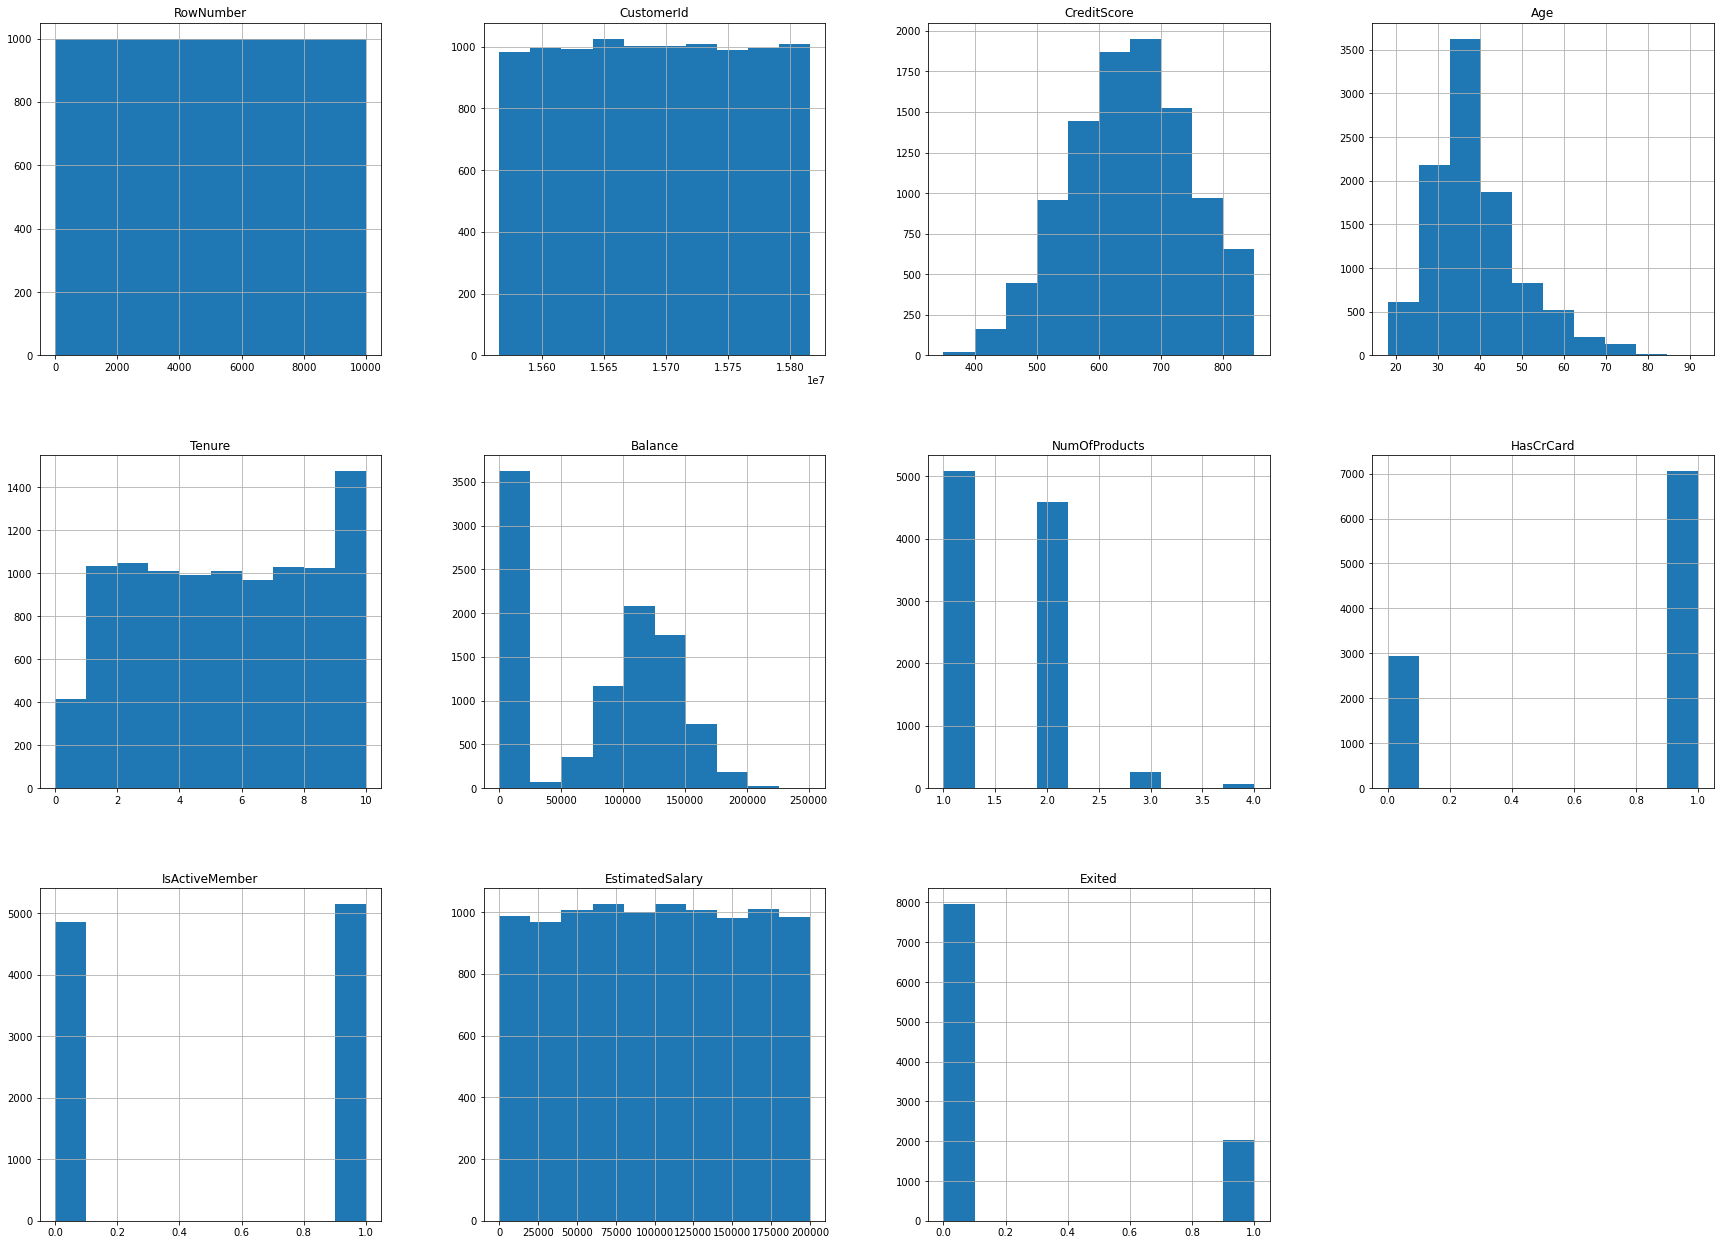

In [9]:
df.hist(layout=(4, 4), figsize=(30, 30))
plt.show()

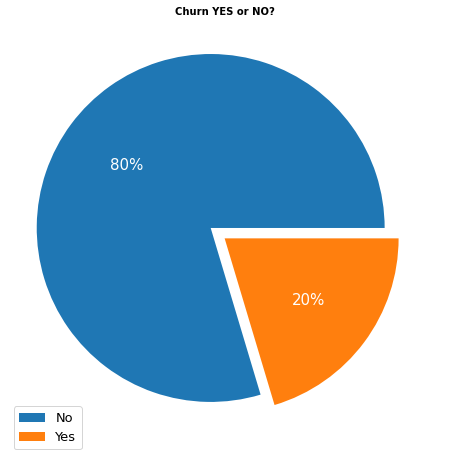

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Churn YES or NO?", size=10, fontweight='bold')
plt.pie(df['Exited'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

> Dapat dilihat dari diagram pie diatas churn rate pada data bank ini ada sebesar 20% atau sebanyak 2037 nasabah dari total 10000 nasabah.

#### Numerical Feature

> Membuat plot untuk melihat korelasi antar data numerik.

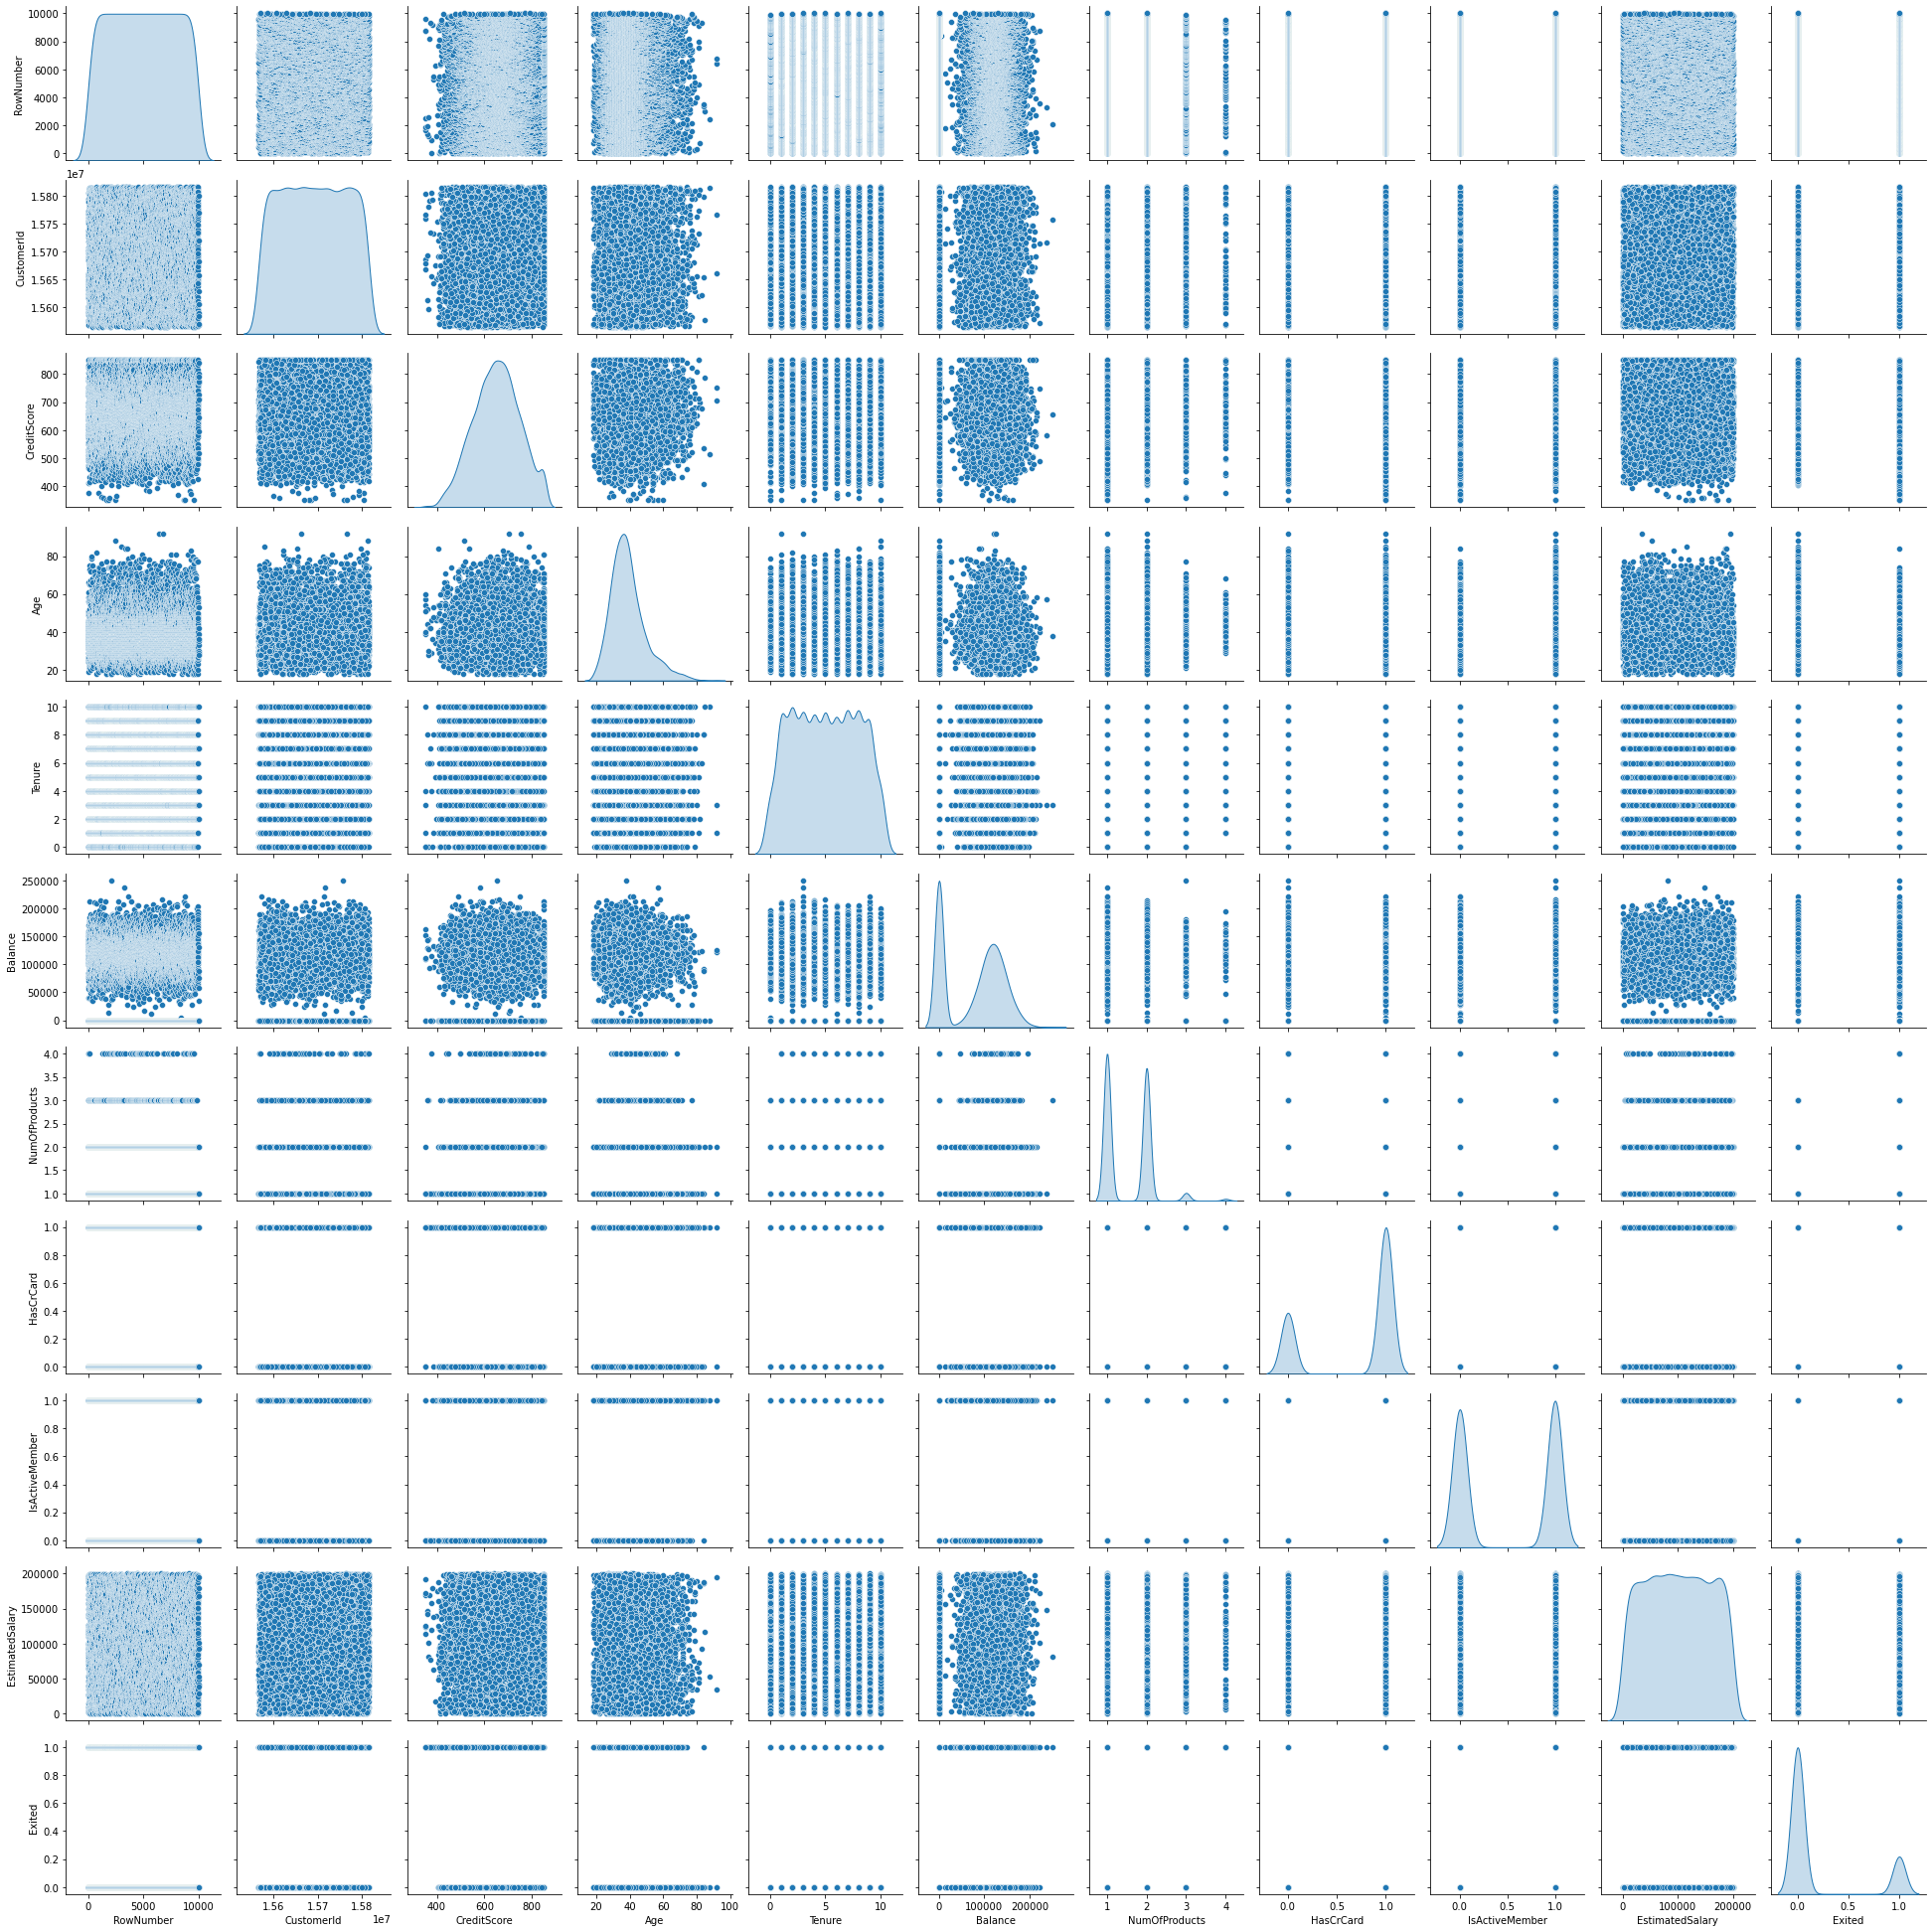

In [12]:
sns.pairplot(df, diag_kind='kde')

> Membuat fungsi untuk melihat persebaran data.

In [13]:
def visualize_data(column_name):
    churn = df[(df['Exited'] == 1)][column_name]
    not_churn = df[(df['Exited'] == 0)][column_name]

    plt.figure(figsize=(12, 6))
    ax = sns.distplot(not_churn)
    ax = sns.distplot(churn)

    ax.legend(['No', 'Yes'])

    plt.xlabel(column_name, fontsize=12)
    plt.title('Distribution of Exited by ' + column_name, fontsize=22)
    plt.tight_layout()
    plt.show()

    print(f"Subscribed by {column_name}")
    print(churn.value_counts().head())
    print(f"Not Subscribed by {column_name}")
    print(not_churn.value_counts().head())

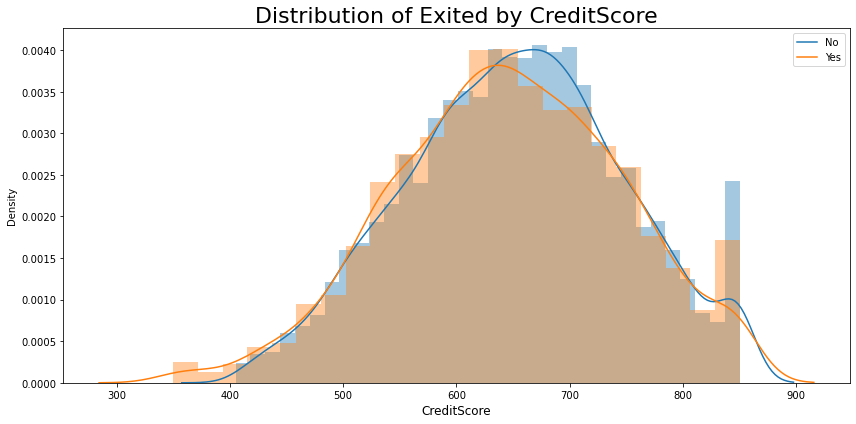

Subscribed by CreditScore
850    43
651    17
705    16
637    14
727    13
Name: CreditScore, dtype: int64
Not Subscribed by CreditScore
850    190
678     50
655     43
684     43
670     42
Name: CreditScore, dtype: int64


In [14]:
visualize_data("CreditScore")

> Dari distplot diatas dapat dilihat bahwa credit score tidak menentukan nasabah keluar atau tidak.

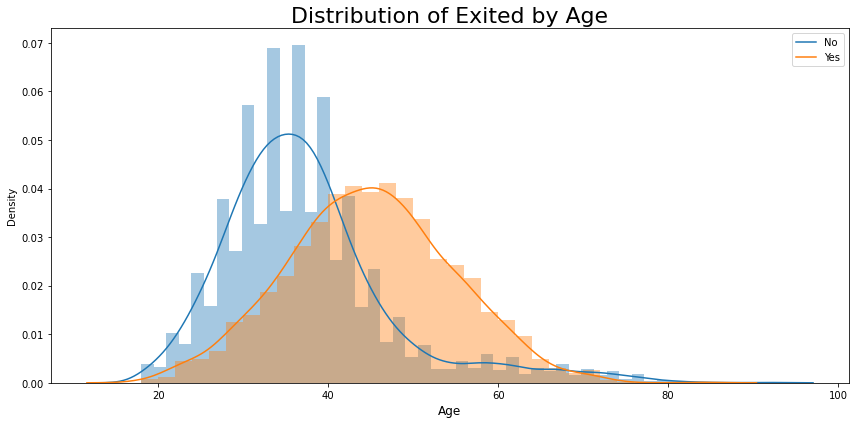

Subscribed by Age
46    91
40    89
43    88
45    87
48    80
Name: Age, dtype: int64
Not Subscribed by Age
35    417
37    416
34    414
38    414
36    403
Name: Age, dtype: int64


In [15]:
visualize_data("Age")

> Dari data diatas dapat dilihat bahwa nasabah yang banyak keluar adalah nasabah yang memiliki berumur diantara 40 - 50 tahun.

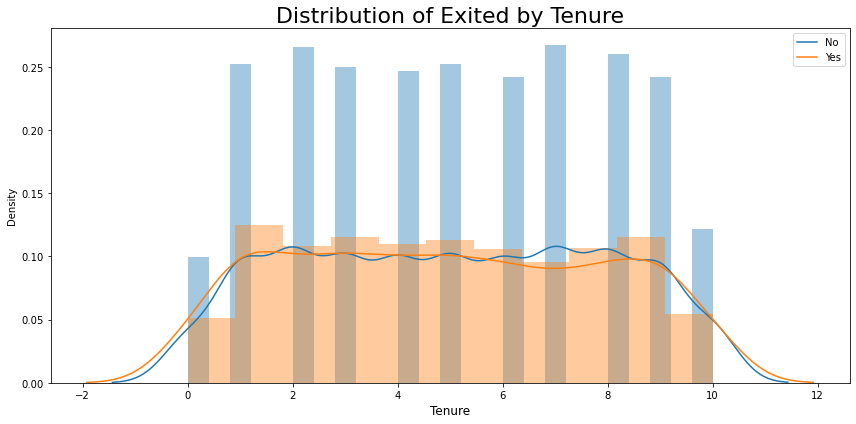

Subscribed by Tenure
1    232
3    213
9    213
5    209
4    203
Name: Tenure, dtype: int64
Not Subscribed by Tenure
7    851
2    847
8    828
1    803
5    803
Name: Tenure, dtype: int64


In [16]:
visualize_data("Tenure")

> Dari distplot diatas dapat dilihat bahwa Tenure tidak menentukan nasabah keluar atau tidak.

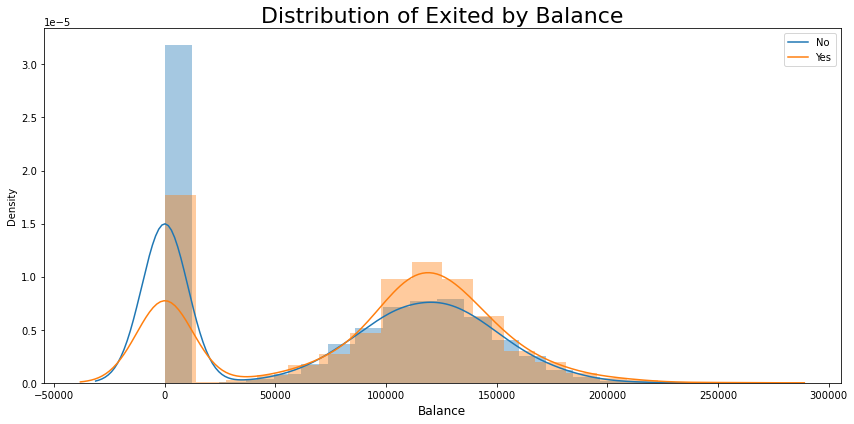

Subscribed by Balance
0.00         500
129934.64      1
104339.11      1
142946.18      1
109908.06      1
Name: Balance, dtype: int64
Not Subscribed by Balance
0.00         3117
130170.82       2
122570.69       1
163085.79       1
197200.04       1
Name: Balance, dtype: int64


In [17]:
visualize_data("Balance")

> Chart tersebut menunjukan nasabah yang banyak keluar adalah nasabah yang memiliki Balance sekitar 100000 - 150000, sedangkan yang banyak keluar adalah nasabah yang memiliki Balance sebesar 0.

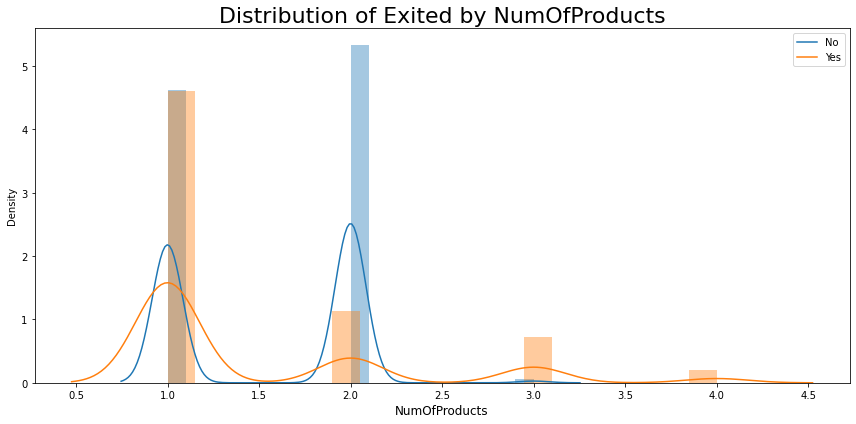

Subscribed by NumOfProducts
1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64
Not Subscribed by NumOfProducts
2    4242
1    3675
3      46
Name: NumOfProducts, dtype: int64


In [18]:
visualize_data("NumOfProducts")

> Plot diatas dapat disimpulkan bahwa jika nasabah memiliki jenis produk 1, 3, dan 4 kemungkinan besar akan keluar, sedangkan nasabah yang memilih jenis produk 2 hanya memiliki kemungkinan kecil untuk keluar.

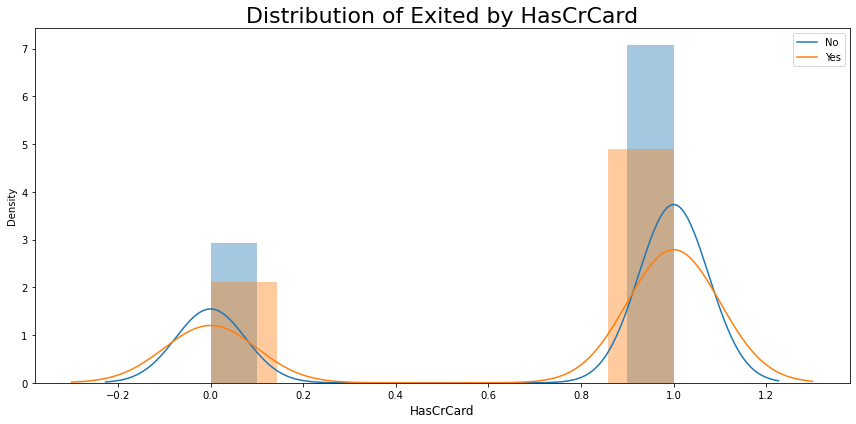

Subscribed by HasCrCard
1    1424
0     613
Name: HasCrCard, dtype: int64
Not Subscribed by HasCrCard
1    5631
0    2332
Name: HasCrCard, dtype: int64


In [19]:
visualize_data("HasCrCard")

> Nasabah yang memiliki ataupun tidak memiliki kartu kredit tidak mempengaruhi seorang nasabah keluar.

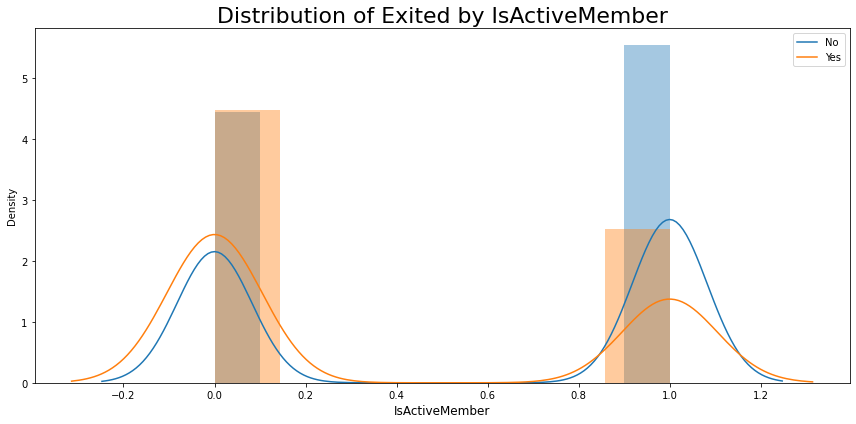

Subscribed by IsActiveMember
0    1302
1     735
Name: IsActiveMember, dtype: int64
Not Subscribed by IsActiveMember
1    4416
0    3547
Name: IsActiveMember, dtype: int64


In [20]:
visualize_data("IsActiveMember")

> Nasabah yang aktif memiliki kemungkinan lebih kecil untuk keluar.

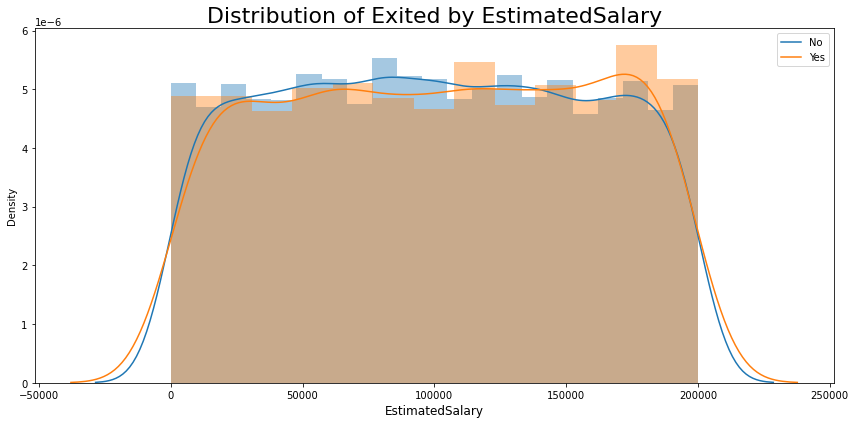

Subscribed by EstimatedSalary
101348.88    1
29583.48     1
193135.25    1
160526.36    1
73489.15     1
Name: EstimatedSalary, dtype: int64
Not Subscribed by EstimatedSalary
24924.92     2
112542.58    1
55362.45     1
198208.00    1
175820.91    1
Name: EstimatedSalary, dtype: int64


In [21]:
visualize_data("EstimatedSalary")

> Estimasi pendapatan nasabah tidak mempengaruhi nasabah tersebut keluar atau tidak.

#### Categorical Feature

> Membuat fungsi untuk melihat korelasi data kategorikal.

In [22]:
def cramersv(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [23]:
df_ctg = df.select_dtypes(include=object)
corr = []
for i in df_ctg:
    matrix = []
    for j in df_ctg:
        matrix.append(cramersv(df_ctg[i], df_ctg[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index=df_ctg.columns, columns=df_ctg.columns)

In [24]:
def visualize_ctg_data(column_name):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column_name, data=df, hue='Exited')
    plt.legend(loc='upper right', fontsize=13)
    plt.xlabel(column_name, fontsize=20)
    plt.xticks(rotation=35)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.heatmap(pd.crosstab(df[column_name], df['Exited'], normalize=True),
                annot=True)

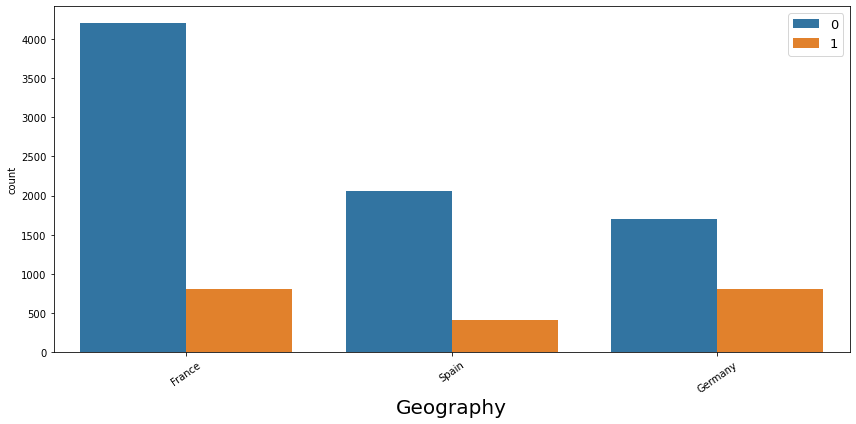

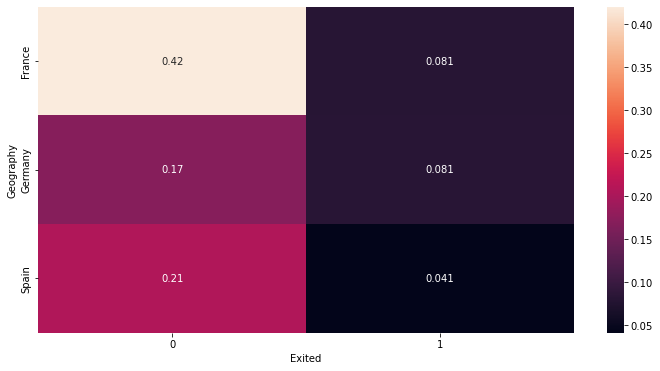

In [25]:
visualize_ctg_data("Geography")

> Nasabah yang berasal dari Prancis adalah nasabah dengan tingkat bertahan paling tinggi sebesar 42%, sedangkan tingkat keluar yang paling tinggi adalah nasabah yang berasal dari Jerman dan Prancis sebesar 0.81%.

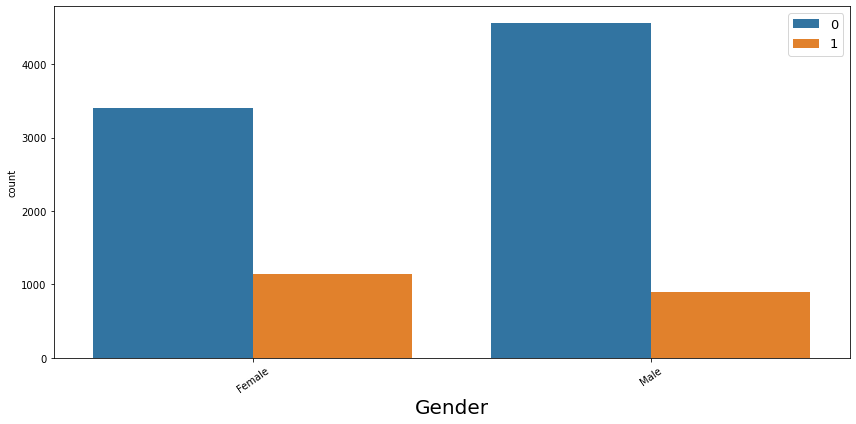

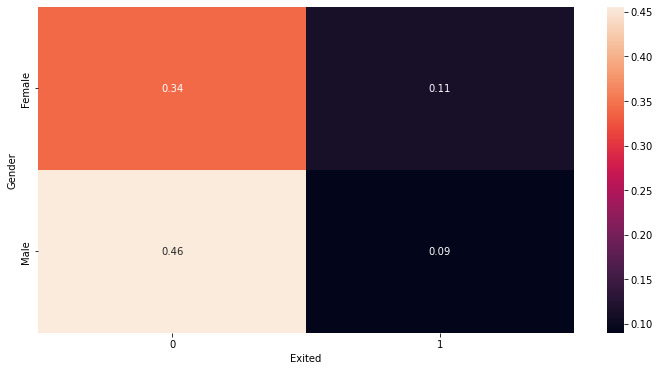

In [26]:
visualize_ctg_data("Gender")

> Nasabah laki-laki lebih banyak yang tidak keluar dibandingkan dengan nasabah perempuan.

##### Correlation Matrix

<AxesSubplot:>

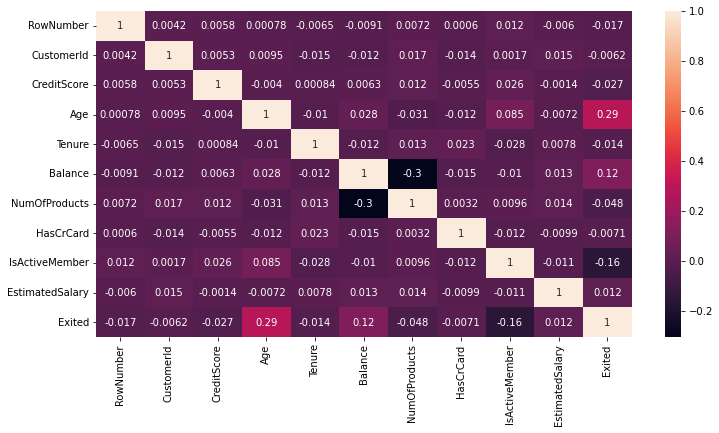

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(exclude=object).corr(), annot=True)

## Data Preparation

### Drop Column

> Membuang kolom yang tidak akan digunakan.

In [28]:
df = df.drop(columns=["Surname", "RowNumber", "CustomerId", "CreditScore", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"])

In [29]:
df.head()

,Geography,Gender,Age,Balance,Exited
0,France,Female,42,0.00,1
1,Spain,Female,41,83807.86,0
2,France,Female,42,159660.80,1
3,France,Female,39,0.00,0
4,Spain,Female,43,125510.82,0


### Outliers Handling

> Membuat boxplot untuk melihat outliers pada kolom CreditScore, Age, Balance, dan EstimatedSalary.

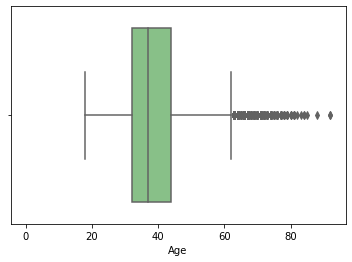

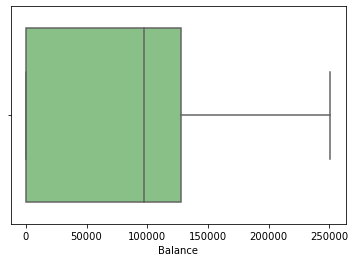

In [30]:
col_name = ["Age", "Balance"]
for i in col_name:
    plt.plot([1, 2, 3])
    sns.boxplot(df[i], palette="Accent")
    plt.show()

> Terdapat outlier pada kolom CreditScore dan Age, outlier ini akan di handling saat melakukan scaling menggunakan robust scaler.

### Encoding

> Melakukan encoding agar data kategorikal dapat dibaca oleh model machine learning.

In [31]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [32]:
df.head()

,Age,Balance,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,0.00,1,0,0,0
1,41,83807.86,0,0,1,0
2,42,159660.80,1,0,0,0
3,39,0.00,0,0,0,0
4,43,125510.82,0,0,1,0


### Train Test Split

> Membagi data menjadi data train (80%) dan data test  (20%).

In [33]:
X = df.drop(columns=["Exited"])
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [34]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10000
Total # of sample in train dataset: 8000
Total # of sample in test dataset: 2000


### Scaling

> Melakukan scaling data dengan robust scaler, karena dataset memiliki banyak outliers serta bukan distribusi normal. Selain itu hanya melakukan scaling data train, tidak untuk data test untuk mencegah kebocoran data.

In [35]:
numerical_features = ['Age', 'Balance']
scaler = RobustScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,Balance
9216,-0.583333,-0.758721
7324,0.166667,-0.758721
918,-0.166667,-0.758721
5902,0.250000,-0.758721
2807,-0.333333,0.370757


In [36]:
X_train[numerical_features].describe().round(4)

,Age,Balance
count,8000.0000,8000.0000
mean,0.1561,-0.1603
std,0.8779,0.4902
min,-1.5833,-0.7587
25%,-0.4167,-0.7587
50%,0.0000,-0.0000
75%,0.5833,0.2413
max,4.5833,1.2034


## Modeling

In [37]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### KNN

> Membuat model KNN dengan neighbors sebanyak 10 data.

In [38]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

### Random Forest

> Membuat model Random Forest dengan estimator sebanyak 50, maksimal kedalaman pencarian sebanyak 16.

In [39]:
RF = RandomForestRegressor(n_estimators=35, max_depth=10, random_state=55)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Adaboost Algorithm

> Membuat model Adaboost.

In [40]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluation

> Memperlihatkan hasil evaluasi model, dimana data test akan discaling terlebih dahulu.

In [41]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

> Mencari nilai mean squared error untuk melihat besarnya error dari masing-masing model.

In [42]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

In [43]:
mse

,train,test
KNN,0.000119,0.000139
RF,0.000098,0.000135
Boosting,0.000134,0.000137


> Melakukan visualisasi nilai akurasi train dan test dari masing-masing model.

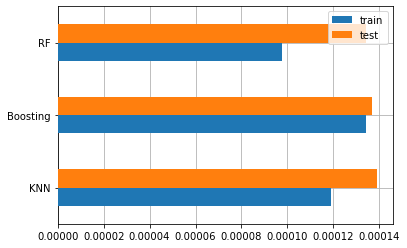

In [46]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [45]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2656,0,0.1,0.1,0.1


## Summary

>Didapatkan kesimpulan dari proyek predictive analysis ini, yaitu berdasarkan prediksi *Churn* nasabah bank dengan menggunakan tiga model regresi Machine Learning, yaitu K-Neighbors Regressor, Random Forest, dan AdaBoost, yaitu algortima AdaBoosting adalah algoritma yang paling baik dalam memprediksi *Churn* dibandingkan dua algoritma lainnya. Hal ini dapat dilihat pada diagram diatas, dimana akurasi prediksi data *train* dan *test* memiliki akurasi yang tinggi, dan perbedaan antara kedua akurasi tersebut tidak terlalu besar.